# User Enagagement

In [1]:
import pickle
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("C:\\Users\\dell\\Desktop\\Week1_challenge_data_sourcex.csv")

#### Tracking the user-engagement 
    
       grouping the customers based on the metrics of session frequency, the duration of session, and total traffic to track          the user activity on the network

In [3]:
df['total_dv'] = df['totalUL'] + df['totalDL']
user_engagement_df = df[['msisdn', 'Bearer Id', 'dur', 'total_dv']]

user_engagement_df = user_engagement_df.groupby(
    'msisdn').agg({'Bearer Id': 'count', 'dur': 'sum', 'total_dv': 'sum'})
user_engagement_df = user_engagement_df.rename(
    columns={'Bearer Id': 'XDR Sessions'})
user_engagement_df.head(10)

XDR Sessions       dur      total_dv
msisdn                                            
3.360100e+10             1  116720.0  8.786906e+08
3.360100e+10             1  181230.0  1.568596e+08
3.360100e+10             1  134969.0  5.959665e+08
3.360101e+10             1   49878.0  4.223207e+08
3.360101e+10             2   37104.0  1.457411e+09
3.360101e+10             2  253983.0  6.152172e+08
3.360101e+10             2  128360.0  6.547231e+08
3.360101e+10             1   86399.0  3.326604e+08
3.360101e+10             2  495702.0  9.901322e+08
3.360102e+10             1  124854.0  7.324638e+08

#### The top 10 Customers based on Engagement Metric

    we have aggregated the above metrics(frequency, duration and total data volume) per customer id(mssidn). and this below are the top 10 customers that are the most engaged.

In [4]:
user_engagement_df.nlargest(10, 'XDR Sessions')

XDR Sessions         dur      total_dv
msisdn                                              
3.362632e+10            18   8791927.0  7.971167e+09
3.361489e+10            17   9966898.0  8.846226e+09
3.362578e+10            17  18553754.0  8.499621e+09
3.365973e+10            16   4035428.0  7.705863e+09
3.367588e+10            15   4865947.0  7.891111e+09
3.376054e+10            15   9279434.0  8.514774e+09
3.366716e+10            13   8744914.0  5.618394e+09
3.360313e+10            12   6287761.0  4.976195e+09
3.360452e+10            12   5207990.0  5.487855e+09
3.362708e+10            12   4703516.0  5.754731e+09

In [5]:
# top 10 customers per total data traffic
user_engagement_df.nlargest(10, 'total_dv')

XDR Sessions         dur      total_dv
msisdn                                              
3.361489e+10            17   9966898.0  8.846226e+09
3.376054e+10            15   9279434.0  8.514774e+09
3.362578e+10            17  18553754.0  8.499621e+09
3.362632e+10            18   8791927.0  7.971167e+09
3.367588e+10            15   4865947.0  7.891111e+09
3.365973e+10            16   4035428.0  7.705863e+09
3.366646e+10            11   4536757.0  7.308501e+09
3.376041e+10            12   5321667.0  7.132371e+09
3.366471e+10            11   2927785.0  6.872018e+09
3.369879e+10            11   5169128.0  6.540899e+09

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_engagement_df)
scaled_data

array([[-0.4812899 , -0.15801408,  0.38229732],
       [-0.4812899 ,  0.18814798, -1.08766633],
       [-0.4812899 , -0.06008955, -0.19345265],
       ...,
       [-0.4812899 ,  3.92373087, -0.93439522],
       [-0.4812899 ,  0.57342835, -0.19279826],
       [-0.4812899 ,  3.8832657 , -1.12372349]])

In [7]:
normalized_data = normalize(scaled_data)
normalized_data

array([[-0.75837458, -0.24898479,  0.60239071],
       [-0.39968156,  0.15624529, -0.90323976],
       [-0.92168892, -0.11507383, -0.37046937],
       ...,
       [-0.11848395,  0.96594411, -0.23002943],
       [-0.62257276,  0.74175848, -0.24939427],
       [-0.11822006,  0.95385314, -0.27602211]])

In [8]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(normalized_data)
kmeans.labels_

array([2, 1, 1, ..., 0, 1, 0])

In [9]:
user_engagement_df.insert(0, 'cluster', kmeans.labels_)
user_engagement_df

cluster  XDR Sessions       dur      total_dv
msisdn                                                     
3.360100e+10        2             1  116720.0  8.786906e+08
3.360100e+10        1             1  181230.0  1.568596e+08
3.360100e+10        1             1  134969.0  5.959665e+08
3.360101e+10        1             1   49878.0  4.223207e+08
3.360101e+10        0             2   37104.0  1.457411e+09
...               ...           ...       ...           ...
3.379000e+10        2             1    8810.0  7.146416e+08
3.379000e+10        1             1  140988.0  4.803073e+08
3.197021e+12        0             1  877385.0  2.321240e+08
3.370000e+14        1             1  253030.0  5.962878e+08
8.823971e+14        0             1  869844.0  1.391536e+08

[106856 rows x 4 columns]

In [10]:
user_engagement_df['cluster'].value_counts()

1    47883
2    29691
0    29282
Name: cluster, dtype: int64

In [43]:
fig = px.scatter(user_engagement_df.sample(20000), x='total_dv', y='dur',
                 color='cluster', size='XDR Sessions')
fig.update_traces(marker_size=8)
fig.update(layout_yaxis_range = [0, 800000])
fig.update(layout_xaxis_range = [0, 4000000000])
fig.show()


## comment

In [12]:
i=0
def agg():
    for i in range(3):
        cluster = user_engagement_df[user_engagement_df["cluster"]==i]
        print("Cluster " + (i+1) * "I")
        v = cluster[['XDR Sessions', 'dur', 'total_dv']].describe()
        print(v)
        print("\n")
print(agg())  

Cluster I
       XDR Sessions           dur      total_dv
count  29282.000000  2.928200e+04  2.928200e+04
mean       2.426986  2.656081e+05  1.209544e+09
std        0.943331  3.093586e+05  5.929071e+08
min        1.000000  1.823500e+04  9.705338e+07
25%        2.000000  1.311805e+05  8.220485e+08
50%        2.000000  2.027725e+05  1.107667e+09
75%        3.000000  3.265848e+05  1.463300e+09
max       18.000000  1.855375e+07  8.846226e+09


Cluster II
       XDR Sessions            dur      total_dv
count  47883.000000   47883.000000  4.788300e+04
mean       1.002214  106413.888979  3.347810e+08
std        0.090684   69939.130848  1.527114e+08
min        0.000000    7189.000000  3.324901e+07
25%        1.000000   59480.500000  2.042567e+08
50%        1.000000   87331.000000  3.325698e+08
75%        1.000000  142696.500000  4.647237e+08
max        2.000000  780471.000000  7.065460e+08


Cluster III
       XDR Sessions            dur      total_dv
count  29691.000000   29691.000000  2.969

### Summarize miminum maximum average for each cluster


In [13]:
df['Other_dv'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']
user_app_engagement_df = df[['msisdn', 'social', 'google',
    'email', 'youtube', 'netflix',
    'gaming', 'Other_dv']]

In [14]:
user_app_engagement_df.groupby('msisdn').sum
user_app_engagement_df.head(10)

msisdn     social      google      email     youtube     netflix  \
0  3.366496e+10  1570185.0   2905912.0  3701304.0  18355943.0  17855187.0   
1  3.368185e+10  1933278.0   4414096.0   937385.0  39359124.0  35565545.0   
2  3.376063e+10  1726277.0  10229119.0  3363124.0  34425237.0  23751202.0   
3  3.375034e+10   657493.0  11811761.0  2070983.0  36534765.0  15092588.0   
4  3.369980e+10   912788.0   7748843.0  2110349.0  34222253.0  17539799.0   
5  3.366819e+10  3200014.0  12934133.0  2902410.0  23944031.0  13881809.0   
6  3.366537e+10  1624991.0   4906872.0  2090979.0   9120760.0  31212766.0   
7  3.376349e+10  3161403.0   3872713.0  3500104.0  31924969.0  18933702.0   
8  3.369874e+10   372625.0   8902099.0  3380069.0  29297508.0  19054441.0   
9  3.365922e+10  1585413.0   8778341.0   766046.0  22911539.0  13185350.0   

        gaming     Other_dv  
0  292426453.0  180558843.0  
1  609920783.0  541959383.0  
2  229980251.0  414908351.0  
3  810387875.0  761837216.0  
4  531237049.0  564619822.0  
5  723461512.0  659414334.0  
6   58881157.0  814303325.0  
7  765055811.0  545316477.0  
8  828219634.0  187669517.0  
9  812946425.0   77671250.0

In [16]:
social_media = user_app_engagement_df.nlargest(10, "social")['social']
social_media

32217     3650861.0
105238    3650240.0
147105    3648814.0
50251     3648729.0
98107     3648659.0
31907     3648092.0
45504     3648027.0
11151     3647700.0
9945      3647486.0
7417      3647484.0
Name: social, dtype: float64

In [18]:
google = user_app_engagement_df.nlargest(10, "google")['google']
google

92913    15528782.0
48780    15517324.0
80821    15508567.0
27384    15507131.0
3297     15506449.0
53075    15506141.0
82610    15493921.0
90229    15483654.0
16844    15481311.0
74104    15479714.0
Name: google, dtype: float64

In [19]:
email = user_app_engagement_df.nlargest(10, "email")['email']
email

43873     4518036.0
88190     4513579.0
14756     4513000.0
57130     4512730.0
28657     4510915.0
103717    4510178.0
114816    4510075.0
142441    4508480.0
79122     4507049.0
136825    4507045.0
Name: email, dtype: float64

In [21]:
youtube = user_app_engagement_df.nlargest(10, "youtube")['youtube']
youtube

66493     45190078.0
102091    45179008.0
15638     45170035.0
107601    45162724.0
135103    45158398.0
118044    45110515.0
45398     45108826.0
134564    45104757.0
13805     45093369.0
68228     45091533.0
Name: youtube, dtype: float64

In [22]:
netflix = user_app_engagement_df.nlargest(10, "netflix")['netflix']
youtube

66493     45190078.0
102091    45179008.0
15638     45170035.0
107601    45162724.0
135103    45158398.0
118044    45110515.0
45398     45108826.0
134564    45104757.0
13805     45093369.0
68228     45091533.0
Name: youtube, dtype: float64

In [23]:
gaming = user_app_engagement_df.nlargest(10, "gaming")['gaming']
gaming

82105     859202784.0
76363     859010933.0
2886      858902084.0
44290     858735183.0
66388     858652760.0
125033    858643269.0
11706     858562729.0
28398     858506410.0
133036    858448232.0
71916     858367124.0
Name: gaming, dtype: float64

### Top 3 Most used applications

In [45]:
user_app_engagement_dfx = df[['social', 'google','email', 'youtube', 'netflix','gaming']]
apps_sum = user_app_engagement_dfx.sum().sort_values(ascending=False)
apps_sum.head(3)

gaming     6.455040e+13
youtube    3.396545e+12
netflix    3.394314e+12
dtype: float64

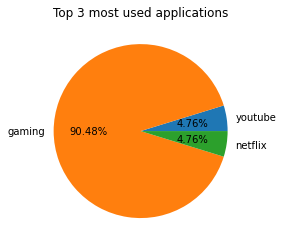

In [69]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Top 3 most used applications')
user_app_engagement_df[['youtube','gaming','netflix']].sum().plot.pie(legend=False, autopct='%1.2f%%', ax=ax)
ax.set_ylabel(None)
plt.show()

In [46]:
def choose_kmeans(df: pd.DataFrame, num: int):
  distortions = []
  inertias = []
  K = range(1, num)
  for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    distortions.append(sum(
        np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeans.inertia_)

  return (distortions, inertias)

In [70]:
distortions, inertias = choose_kmeans(normalized_data, 20)
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Distortion", "Inertia")
)
fig.add_trace(go.Scatter(x=np.array(range(1, 20)), y=distortions), row=1, col=1)
fig.add_trace(go.Scatter(x=np.array(range(1, 20)), y=inertias), row=1, col=2)
fig.update_layout(title_text="The Elbow Method", height=500)
fig.show()

#### k=5 is the value, so its good to make 5 clusters

In [72]:
kmeans = KMeans(n_clusters=5, random_state=6).fit(normalized_data)
kmeans.labels_

array([3, 0, 0, ..., 2, 2, 2])

In [81]:
user_engagement_df["newcluster"]= kmeans.labels_

In [88]:
fig = px.scatter(user_engagement_df, x='total_dv', y='dur',
                 color='newcluster', size='XDR Sessions')
fig.update_traces(marker_size=8)
fig.update(layout_yaxis_range = [0, 2000000])
fig.update(layout_xaxis_range = [0, 5000000000])
fig.show()